In [1]:
# import warnings
# warnings.filterwarnings('ignore')

# 기본 데이터 분석 패키지
import numpy as np
import pandas as pd
import scipy as sp

# 데이터 시각화 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 기타
import pickle
import random

from IPython.display import display 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

np.random.seed(1)
random_state = 1

%matplotlib inline

In [2]:
train = pd.read_csv("csv/train.csv")
test = pd.read_csv("csv/test.csv")

In [3]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [4]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


#### test, train concat

In [6]:
test["SalePrice"] = np.nan

In [7]:
house = pd.concat([train, test])
house.reset_index(inplace=True, drop=True)

In [8]:
house.shape

(2919, 81)

## data 전처리

In [9]:
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [10]:
qual_df = pd.Series([50, 40, 30, 20, 10, 0], index=["Ex", "Gd", "TA", "Fa", "Po", "NA"])
qual_df

Ex    50
Gd    40
TA    30
Fa    20
Po    10
NA     0
dtype: int64

### LotFrontage

- NaN 값 채우기

In [128]:
print(len(house[house.LotFrontage.isna()]))
print(len(house))
house[house.LotFrontage.notna()].tail()

486
2919


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SaleType,SaleCondition,SalePrice,ExterQual_emb,ExterCond_emb,BsmtQual_emb,BsmtCond_emb,BsmtExposure_emb,BsmtFinType1_emb,BsmtFinType2_emb,HeatingQC_emb,Electrical_emb,KitchenQual_emb,Fireplaces_emb,FireplaceQu_emb,GarageFinish_emb,GarageQual_emb,GarageCond_emb,PavedDrive_emb,PoolQC_emb,FenceType,FenceQual,MoSold_emb
2914,2915,160,RM,21.0,1936,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,0.0,0.0,546.0,546.0,GasA,Y,546,546,0,1092,0.0,0.0,1,1,3,1,5,Typ,0,NA,0.0,0.0,0.0,0,0,0,0,0,0,WD,Normal,NaN,30,30,30,30,10,10,10,40,40,30,1420,0,0,0,0,30,0,NA,10,503.0
2915,2916,160,RM,21.0,1894,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,252.0,0.0,294.0,546.0,GasA,Y,546,546,0,1092,0.0,0.0,1,1,3,1,6,Typ,0,CarPort,1970.0,1.0,286.0,0,24,0,0,0,0,WD,Abnorml,NaN,30,30,30,30,10,30,10,30,40,30,1420,0,10,30,30,30,0,NA,10,279.0
2916,2917,20,RL,160.0,20000,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,VinylSd,None,0.0,CBlock,1224.0,0.0,0.0,1224.0,GasA,Y,1224,0,0,1224,1.0,0.0,1,0,4,1,7,Typ,1,Detchd,1960.0,2.0,576.0,474,0,0,0,0,0,WD,Abnorml,NaN,30,30,30,30,10,50,10,50,40,30,1268,30,10,30,30,30,0,NA,10,158.0
2917,2918,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,HdBoard,Wd Shng,None,0.0,PConc,337.0,0.0,575.0,912.0,GasA,Y,970,0,0,970,0.0,1.0,1,0,3,1,6,Typ,0,NA,0.0,0.0,0.0,80,32,0,0,0,700,WD,Normal,NaN,30,30,40,30,30,60,10,30,40,30,1420,0,0,0,0,30,0,Prv,20,446.0
2918,2919,60,RL,74.0,9627,NaN,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,HdBoard,HdBoard,BrkFace,94.0,PConc,758.0,0.0,238.0,996.0,GasA,Y,996,1004,0,2000,0.0,0.0,2,1,3,1,9,Typ,1,Attchd,1993.0,3.0,650.0,190,48,0,0,0,0,WD,Normal,NaN,30,30,40,30,30,20,10,50,40,30,1268,30,30,30,30,30,0,NA,10,142.0


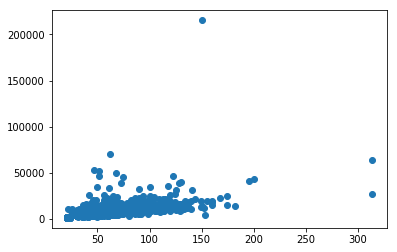

In [123]:
plt.scatter(house[house.LotFrontage.notna()].LotFrontage, house[house.LotFrontage.notna()].LotArea)
plt.show()

In [191]:
df = house[house.LotFrontage.notna()]

In [192]:
imp_df = house[house.LotFrontage.isna()]
# imp_df = df[df.LotArea < 100000]

In [190]:
corr = np.corrcoef(df.LotFrontage, df.LotArea)[1][0] * 100
print("correlation: {}%".format(round(corr, 2)))

corr = np.corrcoef(df[df.LotArea < 100000].LotFrontage, df[df.LotArea < 100000].LotArea)[1][0] * 100
print("correlation: {}%".format(round(corr, 2)))

correlation: 48.99%
correlation: 58.54%


In [186]:
# for i in range(1, len(temp.columns)):
#     if temp.columns[i] != 'SalePrice':
#         corr = np.corrcoef(temp.LotFrontage, temp.columns[i])[1][0] * 100
#         print("{} correlation: {}%".format(temp.columns[i], round(corr, 2)))

### Street

In [11]:
house.drop(columns=["Street"], axis=1, inplace=True)

### Utilities

In [12]:
house.drop(columns=["Utilities"], axis=1, inplace=True)

### Condition1

In [13]:
mask = house.Condition1 != 'Norm'
house.loc[mask, 'Condition1'] = 'Other'
del mask

### Condition2

In [14]:
mask = house.Condition2 != 'Norm'
house.loc[mask, 'Condition2'] = 'Other'
del mask

### RoofMatl

In [15]:
house.drop(columns=["RoofMatl"], axis=1, inplace=True)

### Exterior1st

In [16]:
house["Exterior1st"].fillna("None", inplace=True)

In [17]:
key = house.Exterior1st.value_counts() < 10
mask = house["Exterior1st"].map(key)
house.loc[mask, 'Exterior1st'] = 'Other'
del key, mask

In [18]:
# indices = list(house.Exterior1st[(house.Exterior1st == "BrkComm")| (house.Exterior1st == "AsphShn") | (house.Exterior1st == "Stone") | (house.Exterior1st == "CBlock") | (house.Exterior1st == "None") | (house.Exterior1st == "ImStucc")].index)
# for index in indices:
#     house.loc[index, 'Exterior1st'] = "other"

In [19]:
house.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
Other        14
Name: Exterior1st, dtype: int64

### Exterior2nd

In [20]:
house["Exterior2nd"].fillna("None", inplace=True)

In [21]:
key = house.Exterior2nd.value_counts() < 10
mask = house["Exterior2nd"].map(key)
house.loc[mask, 'Exterior2nd'] = 'Other'
del key, mask

In [22]:
house.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
Other        15
ImStucc      15
Name: Exterior2nd, dtype: int64

### MasVnrType

In [23]:
# fill NaN 
house["MasVnrType"].fillna("None", inplace=True)

### MasVnrArea

In [24]:
# fill NaN 
house["MasVnrArea"].fillna(0, inplace=True)
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,NaN,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


### ExterQual

In [25]:
house["ExterQual_emb"] = house["ExterQual"].map(qual_df).astype(int)
house.drop(columns=["ExterQual"], axis=1, inplace=True)
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_emb
2914,2915,160,RM,21.0,1936,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,CmentBd,None,0.0,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,30
2915,2916,160,RM,21.0,1894,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,CmentBd,None,0.0,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,30
2916,2917,20,RL,160.0,20000,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,VinylSd,None,0.0,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,30
2917,2918,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,HdBoard,Wd Shng,None,0.0,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,30
2918,2919,60,RL,74.0,9627,NaN,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,HdBoard,HdBoard,BrkFace,94.0,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,30


### ExterCond

In [26]:
house["ExterCond_emb"] = house["ExterCond"].map(qual_df).astype(int)
house.drop(columns=["ExterCond"], axis=1, inplace=True)
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_emb,ExterCond_emb
2914,2915,160,RM,21.0,1936,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,30,30
2915,2916,160,RM,21.0,1894,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,30,30
2916,2917,20,RL,160.0,20000,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,VinylSd,None,0.0,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,30,30
2917,2918,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,HdBoard,Wd Shng,None,0.0,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,30,30
2918,2919,60,RL,74.0,9627,NaN,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,HdBoard,HdBoard,BrkFace,94.0,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,30,30


### BsmtQual

In [27]:
# fill NaN 
house["BsmtQual"].fillna("NA", inplace=True)

In [28]:
house["BsmtQual_emb"] = house["BsmtQual"].map(qual_df).astype(int)
house.drop(columns=["BsmtQual"], axis=1, inplace=True)
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_emb,ExterCond_emb,BsmtQual_emb
2914,2915,160,RM,21.0,1936,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,30,30,30
2915,2916,160,RM,21.0,1894,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,30,30,30
2916,2917,20,RL,160.0,20000,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,VinylSd,None,0.0,CBlock,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,30,30,30
2917,2918,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,HdBoard,Wd Shng,None,0.0,PConc,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,30,30,40
2918,2919,60,RL,74.0,9627,NaN,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,HdBoard,HdBoard,BrkFace,94.0,PConc,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,30,30,40


### BsmtCond

- NaN 값 처리 => no basement인 것으로 추정됨

In [29]:
# fill NaN 
house["BsmtCond"].fillna("NA", inplace=True)

In [30]:
house["BsmtCond_emb"] = house["BsmtCond"].map(qual_df).astype(int)
house.drop(columns=["BsmtCond"], axis=1, inplace=True)
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_emb,ExterCond_emb,BsmtQual_emb,BsmtCond_emb
2914,2915,160,RM,21.0,1936,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,30,30,30,30
2915,2916,160,RM,21.0,1894,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,30,30,30,30
2916,2917,20,RL,160.0,20000,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,VinylSd,None,0.0,CBlock,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,30,30,30,30
2917,2918,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,HdBoard,Wd Shng,None,0.0,PConc,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,30,30,40,30
2918,2919,60,RL,74.0,9627,NaN,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,HdBoard,HdBoard,BrkFace,94.0,PConc,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,30,30,40,30


### BsmtExposure

In [31]:
# fill NaN 
house.loc[house["Id"] == 949, 'BsmtExposure'] = "Av"
house["BsmtExposure"].fillna("NA", inplace=True)

In [32]:
Bsmt_df = pd.Series([40, 30, 20, 10, 0], index=["Gd", "Av", "Mn", "No", "NA"])
Bsmt_df

Gd    40
Av    30
Mn    20
No    10
NA     0
dtype: int64

In [33]:
house["BsmtExposure_emb"] = house["BsmtExposure"].map(Bsmt_df).astype(int)
del Bsmt_df
house.drop(columns=["BsmtExposure"], axis=1, inplace=True)
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_emb,ExterCond_emb,BsmtQual_emb,BsmtCond_emb,BsmtExposure_emb
2914,2915,160,RM,21.0,1936,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,30,30,30,30,10
2915,2916,160,RM,21.0,1894,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,30,30,30,30,10
2916,2917,20,RL,160.0,20000,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,VinylSd,None,0.0,CBlock,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,30,30,30,30,10
2917,2918,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,HdBoard,Wd Shng,None,0.0,PConc,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,30,30,40,30,30
2918,2919,60,RL,74.0,9627,NaN,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,HdBoard,HdBoard,BrkFace,94.0,PConc,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,30,30,40,30,30


### BsmtFinType1

In [34]:
# fill NaN 
house["BsmtFinType1"].fillna("NA", inplace=True)

In [35]:
Bsmt_df = pd.Series([60, 50, 40, 30, 20, 10, 0], index=["GLQ", "ALQ", "BLQ", "Rec", "LwQ", "Unf",  "NA"])
Bsmt_df

GLQ    60
ALQ    50
BLQ    40
Rec    30
LwQ    20
Unf    10
NA      0
dtype: int64

In [36]:
house["BsmtFinType1_emb"] = house["BsmtFinType1"].map(Bsmt_df).astype(int)
del Bsmt_df
house.drop(columns=["BsmtFinType1"], axis=1, inplace=True)
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_emb,ExterCond_emb,BsmtQual_emb,BsmtCond_emb,BsmtExposure_emb,BsmtFinType1_emb
2914,2915,160,RM,21.0,1936,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,30,30,30,30,10,10
2915,2916,160,RM,21.0,1894,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,30,30,30,30,10,30
2916,2917,20,RL,160.0,20000,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,VinylSd,None,0.0,CBlock,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,30,30,30,30,10,50
2917,2918,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,HdBoard,Wd Shng,None,0.0,PConc,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,30,30,40,30,30,60
2918,2919,60,RL,74.0,9627,NaN,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,HdBoard,HdBoard,BrkFace,94.0,PConc,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,30,30,40,30,30,20


### BsmtFinSF1

In [37]:
# fill NaN 
house["BsmtFinSF1"].fillna(0, inplace=True)

### BsmtFinType2

In [38]:
# fill NaN 
house["BsmtFinType2"].fillna("NA", inplace=True)

In [39]:
Bsmt_df = pd.Series([60, 50, 40, 30, 20, 10, 0], index=["GLQ", "ALQ", "BLQ", "Rec", "LwQ", "Unf",  "NA"])
Bsmt_df

GLQ    60
ALQ    50
BLQ    40
Rec    30
LwQ    20
Unf    10
NA      0
dtype: int64

In [40]:
house["BsmtFinType2_emb"] = house["BsmtFinType2"].map(Bsmt_df).astype(int)
del Bsmt_df
house.drop(columns=["BsmtFinType2"], axis=1, inplace=True)
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_emb,ExterCond_emb,BsmtQual_emb,BsmtCond_emb,BsmtExposure_emb,BsmtFinType1_emb,BsmtFinType2_emb
2914,2915,160,RM,21.0,1936,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,0.0,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,30,30,30,30,10,10,10
2915,2916,160,RM,21.0,1894,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,252.0,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,30,30,30,30,10,30,10
2916,2917,20,RL,160.0,20000,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,VinylSd,None,0.0,CBlock,1224.0,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,30,30,30,30,10,50,10
2917,2918,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,HdBoard,Wd Shng,None,0.0,PConc,337.0,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,30,30,40,30,30,60,10
2918,2919,60,RL,74.0,9627,NaN,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,HdBoard,HdBoard,BrkFace,94.0,PConc,758.0,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,30,30,40,30,30,20,10


### BsmtFinSF2

In [41]:
# fill NaN 
house["BsmtFinSF2"].fillna(0, inplace=True)

### BsmtUnfSF

In [42]:
# fill NaN 
house["BsmtUnfSF"].fillna(0, inplace=True)

### TotalBsmtSF

In [43]:
# fill NaN 
house["TotalBsmtSF"].fillna(0, inplace=True)

### HeatingQC

In [44]:
house["HeatingQC_emb"] = house["HeatingQC"].map(qual_df).astype(int)
house.drop(columns=["HeatingQC"], axis=1, inplace=True)
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_emb,ExterCond_emb,BsmtQual_emb,BsmtCond_emb,BsmtExposure_emb,BsmtFinType1_emb,BsmtFinType2_emb,HeatingQC_emb
2914,2915,160,RM,21.0,1936,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,0.0,0.0,546.0,546.0,GasA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,30,30,30,30,10,10,10,40
2915,2916,160,RM,21.0,1894,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,252.0,0.0,294.0,546.0,GasA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,30,30,30,30,10,30,10,30
2916,2917,20,RL,160.0,20000,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,VinylSd,None,0.0,CBlock,1224.0,0.0,0.0,1224.0,GasA,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,30,30,30,30,10,50,10,50
2917,2918,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,HdBoard,Wd Shng,None,0.0,PConc,337.0,0.0,575.0,912.0,GasA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,30,30,40,30,30,60,10,30
2918,2919,60,RL,74.0,9627,NaN,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,HdBoard,HdBoard,BrkFace,94.0,PConc,758.0,0.0,238.0,996.0,GasA,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,30,30,40,30,30,20,10,50


### Electrical

In [45]:
# fill NaN 
house["Electrical"].fillna("SBrkr", inplace=True)
house.loc[house["Electrical"] == "Mix", 'Electrical'] = "FuseP"

In [46]:
electrical_df = pd.Series([40, 30, 20, 10], index=["SBrkr", "FuseA", "FuseF", "FuseP"])
electrical_df

SBrkr    40
FuseA    30
FuseF    20
FuseP    10
dtype: int64

In [47]:
house["Electrical_emb"] = house["Electrical"].map(electrical_df).astype(int)
del electrical_df
house.drop(columns=["Electrical"], axis=1, inplace=True)
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_emb,ExterCond_emb,BsmtQual_emb,BsmtCond_emb,BsmtExposure_emb,BsmtFinType1_emb,BsmtFinType2_emb,HeatingQC_emb,Electrical_emb
2914,2915,160,RM,21.0,1936,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,0.0,0.0,546.0,546.0,GasA,Y,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,30,30,30,30,10,10,10,40,40
2915,2916,160,RM,21.0,1894,NaN,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,CmentBd,None,0.0,CBlock,252.0,0.0,294.0,546.0,GasA,Y,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,30,30,30,30,10,30,10,30,40
2916,2917,20,RL,160.0,20000,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,VinylSd,None,0.0,CBlock,1224.0,0.0,0.0,1224.0,GasA,Y,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,30,30,30,30,10,50,10,50,40
2917,2918,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,HdBoard,Wd Shng,None,0.0,PConc,337.0,0.0,575.0,912.0,GasA,Y,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,30,30,40,30,30,60,10,30,40
2918,2919,60,RL,74.0,9627,NaN,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,HdBoard,HdBoard,BrkFace,94.0,PConc,758.0,0.0,238.0,996.0,GasA,Y,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,30,30,40,30,30,20,10,50,40


### BsmtFullBath

In [48]:
test[test.BsmtHalfBath.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN
728,2189,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,NaN


In [49]:
# fill NaN 
house["BsmtFullBath"].fillna(0, inplace=True)

In [50]:
# BsmtFullBath_df = house["BsmtFullBath"].value_counts()
# house["BsmtFullBath_emb"] = house["BsmtFullBath"].map(BsmtFullBath_df).astype(int)

In [51]:
# house.drop(columns=["BsmtFullBath"], axis=1, inplace=True)
# house.tail()

In [52]:
# del BsmtFullBath_df

In [53]:
# show_feature_num(house, "BsmtFullBath_emb")

### BsmtHalfBath

In [54]:
# fill NaN 
house["BsmtHalfBath"].fillna(0, inplace=True)

In [55]:
# BsmtHalfBath_df = house["BsmtHalfBath"].value_counts()
# house["BsmtHalfBath_emb"] = house["BsmtHalfBath"].map(BsmtHalfBath_df).astype(int)

In [56]:
# house.drop(columns=["BsmtHalfBath"], axis=1, inplace=True)
# house.tail()

In [57]:
# del BsmtHalfBath_df

In [58]:
# show_feature_num(house, "BsmtHalfBath_emb")

### FullBath

In [59]:
# FullBath_df = house["FullBath"].value_counts()
# house["FullBath_emb"] = house["FullBath"].map(FullBath_df).astype(int)

In [60]:
# house.drop(columns=["FullBath"], axis=1, inplace=True)
# house.tail()

In [61]:
# del FullBath_df

In [62]:
# show_feature_num(house, "FullBath_emb")

### HalfBath

In [63]:
# HalfBath_df = house["HalfBath"].value_counts()
# house["HalfBath_emb"] = house["HalfBath"].map(HalfBath_df).astype(int)

In [64]:
# house.drop(columns=["HalfBath"], axis=1, inplace=True)
# house.tail()

In [65]:
# del HalfBath_df

In [66]:
# show_feature_num(house, "HalfBath_emb")

### BedroomAbvGr

In [67]:
# BedroomAbvGr_df = house["BedroomAbvGr"].value_counts()
# house["BedroomAbvGr_emb"] = house["BedroomAbvGr"].map(BedroomAbvGr_df).astype(int)

In [68]:
# house.drop(columns=["BedroomAbvGr"], axis=1, inplace=True)
# house.tail()

In [69]:
# del BedroomAbvGr_df

In [70]:
# show_feature_num(house, "BedroomAbvGr_emb")

### KitchenAbvGr

In [71]:
# KitchenAbvGr_df = house["KitchenAbvGr"].value_counts()
# house["KitchenAbvGr_emb"] = house["KitchenAbvGr"].map(KitchenAbvGr_df).astype(int)

In [72]:
# house.drop(columns=["KitchenAbvGr"], axis=1, inplace=True)
# house.tail()

In [73]:
# del KitchenAbvGr_df

In [74]:
# show_feature_num(house, "KitchenAbvGr_emb")

### KitchenQual

In [75]:
# fill NaN 
house.KitchenQual.fillna("NA", inplace=True)

In [76]:
house["KitchenQual_emb"] = house["KitchenQual"].map(qual_df).astype(int)
house.drop(columns=["KitchenQual"], axis=1, inplace=True)
# house.tail()

### TotRmsAbvGrd

In [77]:
# TotRmsAbvGrd_df = house["TotRmsAbvGrd"].value_counts()
# house["TotRmsAbvGrd_emb"] = house["TotRmsAbvGrd"].map(TotRmsAbvGrd_df).astype(int)
# house.tail()

In [78]:
# del TotRmsAbvGrd_df

In [79]:
# show_feature_num(house, "TotRmsAbvGrd_emb")

### Fireplaces

In [80]:
fireplaces_df = house["Fireplaces"].value_counts()
house["Fireplaces_emb"] = house["Fireplaces"].map(fireplaces_df).astype(int)
del fireplaces_df
# house.tail()

### FireplaceQu

In [81]:
# fill NaN 
house.FireplaceQu.fillna("NA", inplace=True)

In [82]:
house["FireplaceQu_emb"] = house["FireplaceQu"].map(qual_df).astype(int)
house.drop(columns=["FireplaceQu"], axis=1, inplace=True)
# house.tail()

### GarageType

In [83]:
# fill NaN 
house.GarageType.fillna("NA", inplace=True)

### GarageYrBlt

In [84]:
# fill NaN 
house.GarageYrBlt.fillna(0, inplace=True)

### GarageFinish

In [85]:
# fill NaN 
house.GarageFinish.fillna("NA", inplace=True)

In [86]:
garage_df = pd.Series([30, 20, 10, 0], index=["Fin", "RFn", "Unf", "NA"])
garage_df

Fin    30
RFn    20
Unf    10
NA      0
dtype: int64

In [87]:
house["GarageFinish_emb"] = house["GarageFinish"].map(garage_df).astype(int)
del garage_df
house.drop(columns=["GarageFinish"], axis=1, inplace=True)
# house.tail()

### GarageCars

In [88]:
# fill NaN 
house.GarageCars.fillna(0, inplace=True)

### GarageArea

In [89]:
# fill NaN 
house.GarageArea.fillna(0, inplace=True)

### GarageQual

In [90]:
# fill NaN 
house.GarageQual.fillna("NA", inplace=True)

In [91]:
house["GarageQual_emb"] = house["GarageQual"].map(qual_df).astype(int)
house.drop(columns=["GarageQual"], axis=1, inplace=True)
# house.tail()

### GarageCond

In [92]:
# fill NaN 
house.GarageCond.fillna("NA", inplace=True)

In [93]:
house["GarageCond_emb"] = house["GarageCond"].map(qual_df).astype(int)
house.drop(columns=["GarageCond"], axis=1, inplace=True)
# house.tail()

### PavedDrive

In [94]:
paved_df = pd.Series([30, 20, 10], index=["Y", "P", "N"])
paved_df

Y    30
P    20
N    10
dtype: int64

In [95]:
house["PavedDrive_emb"] = house["PavedDrive"].map(paved_df).astype(int)
del paved_df
house.drop(columns=["PavedDrive"], axis=1, inplace=True)
# house.tail()

### PoolArea

In [96]:
house.drop(columns=["PoolArea"], axis=1, inplace=True)

### PoolQC

In [97]:
# fill NaN 
house.PoolQC.fillna("NA", inplace=True)

In [98]:
house["PoolQC_emb"] = house["PoolQC"].map(qual_df).astype(int)
house.drop(columns=["PoolQC"], axis=1, inplace=True)
# house.tail()

### Fence

feature 2개로 분리
- Fence 종류 category feature (Privacy / Wood / No Fence)
- Fence quality numeric feature (Good / Minimum) => data embeding

In [99]:
# fill NaN 
house.Fence.fillna("NA", inplace=True)

In [100]:
fence_type = pd.Series(["Prv", "Prv", "Ww", "Ww", "NA"], index=["GdPrv", "MnPrv", "GdWo", "MnWw", "NA"])
fence_type

house["FenceType"] = house["Fence"].map(fence_type)
del fence_type

In [101]:
fence_qual = pd.Series([30, 20, 30, 20, 10], index=["GdPrv", "MnPrv", "GdWo", "MnWw", "NA"])
fence_qual

house["FenceQual"] = house["Fence"].map(fence_qual).astype(int)
del fence_qual

In [102]:
house.drop(columns=["Fence"], axis=1, inplace=True)
# house.tail()

### MiscFeature

In [103]:
house.drop(columns=["MiscFeature"], axis=1, inplace=True)

### MoSold

In [104]:
MoSold_count = house["MoSold"].value_counts()
house["MoSold_emb"] = house["MoSold"].map(MoSold_count).astype(float)
del MoSold_count

In [105]:
house.drop(columns=["MoSold"], axis=1, inplace=True)
# house.tail()

### YrSold

In [106]:
house.drop(columns=["YrSold"], axis=1, inplace=True)

## data frame

In [107]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SaleType',
       'SaleCondition', 'SalePrice', 'ExterQual_emb', 'ExterCond_emb',
       'BsmtQual_emb', 'BsmtCond_emb', 'BsmtExposure_emb', 'BsmtFinType1_emb',
       'BsmtFinType

In [108]:
get_dummy = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
             'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
             'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
             'Heating','CentralAir', 'Functional', 'GarageType', 'SaleType', 'SaleCondition', 
             'FenceType']

In [109]:
temp = house.filter(get_dummy)

dummy_df = pd.get_dummies(temp[temp.columns[0]])
dummy_df.columns = ["MSSubClass_" + str(col) for col in dummy_df.columns]

for num in range(1, len(temp.columns)):
    dummy = pd.get_dummies(temp[temp.columns[num]])
    dummy.columns = [str(temp.columns[num]) + "_" + str(col) for col in dummy.columns]
    dummy_df = pd.concat([dummy_df, dummy], axis=1)

In [110]:
del temp

In [111]:
get_num = list(set(house.columns) - set(get_dummy))

In [112]:
numeric_df = house.filter(get_num)

In [113]:
df = pd.concat([numeric_df, dummy_df], axis=1)

In [114]:
df.tail()

,GarageQual_emb,FireplaceQu_emb,ExterQual_emb,BsmtFullBath,2ndFlrSF,GarageCars,1stFlrSF,YearRemodAdd,Fireplaces,GarageFinish_emb,KitchenQual_emb,BedroomAbvGr,OverallQual,PoolQC_emb,ExterCond_emb,BsmtQual_emb,HalfBath,MiscVal,WoodDeckSF,TotalBsmtSF,GarageYrBlt,BsmtUnfSF,FullBath,LotFrontage,BsmtFinSF2,BsmtHalfBath,GarageArea,OpenPorchSF,YearBuilt,SalePrice,LotArea,Id,KitchenAbvGr,MoSold_emb,LowQualFinSF,MasVnrArea,BsmtFinType2_emb,HeatingQC_emb,Electrical_emb,FenceQual,Fireplaces_emb,TotRmsAbvGrd,OverallCond,BsmtFinSF1,BsmtFinType1_emb,PavedDrive_emb,3SsnPorch,ScreenPorch,EnclosedPorch,BsmtCond_emb,BsmtExposure_emb,GrLivArea,GarageCond_emb,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_Other,Condition2_Norm,Condition2_Other,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FenceType_NA,FenceType_Prv,FenceType_Ww
2914,0,0,30,0.0,546,0.0,546,1970,0,0,30,3,4,0,30,30,1,0,0,546.0,0.0,546.0,1,21.0,0.0,0.0,0.0,0,1970,NaN,1936,2915,1,503.0,0,0.0,10,40,40,10,1420,5,7,0.0,10,30,0,0,0,30,10,1092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2915,30,0,30,0.0,546,1.0,546,1970,0,10,30,3,4,0,30,30,1,0,0,546.0,1970.0,294.0,1,21.0,0.0,0.0,286.0,24,1970,NaN,1894,2916,1,27

In [115]:
df.to_csv("csv/df.csv", index=False)